Construct your own ResNet:  Write your own code in the below yellow-lines. 

Use below code scripts as the beginning of your own ResNet: 

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


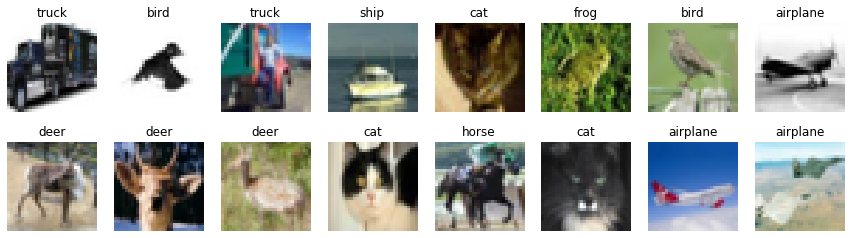

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Add,AveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.engine.input_layer import Input
from keras.initializers import glorot_uniform,he_normal
from keras import regularizers

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [ ]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

X_train/=255
X_test/=255
Y_train = np_utils.to_categorical(y_train, len(cifar10_classes))
Y_test = np_utils.to_categorical(y_test, len(cifar10_classes))
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = Y_train[:10000]
partial_y_train = Y_train[10000:]
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)
val_gen = ImageDataGenerator()
train_generator = gen.flow(partial_x_train, partial_y_train, batch_size=64)
val_generator = val_gen.flow(x_val, y_val, batch_size=64)

X_input = Input((32,32,3))
# Zero-Padding
X = ZeroPadding2D(padding=(3, 3), data_format=None)(X_input)

# Stage 1
X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)
# Stage 2 for ResNet

# Save the input value. You'll need this later to add back to the main path.
X_shortcut = X
# Below is the script for your own ResNet:
X = ZeroPadding2D(padding=(1, 1), data_format=None)(X)
X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv2')(X)
X = Activation('relu')(X)

X = ZeroPadding2D(padding=(1, 1), data_format=None)(X)
X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv3', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv3')(X)

X = Add()([X,X_shortcut])
X = Activation('relu')(X)

X = Flatten()(X)
X = Dense(NUM_CLASSES,activation='softmax', name='fc' + str(NUM_CLASSES), kernel_initializer = glorot_uniform(seed=0))(X)


In [ ]:
model = Model(inputs = X_input, outputs = X, name='ResNet50')
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',  
    optimizer=Adam(), 
    metrics=['accuracy']) 
model.fit_generator(train_generator, steps_per_epoch=50000//64, epochs=10, 
 validation_data=val_generator, validation_steps=10000//64)

Epoch 1/10
781/781 [==============================] - 170s 218ms/step - loss: 1.5563 - accuracy: 0.4605 - val_loss: 1.7208 - val_accuracy: 0.3557
Epoch 2/10
781/781 [==============================] - 156s 200ms/step - loss: 1.1875 - accuracy: 0.5835 - val_loss: 1.1724 - val_accuracy: 0.5515
Epoch 3/10
781/781 [==============================] - 150s 192ms/step - loss: 1.0425 - accuracy: 0.6326 - val_loss: 1.5465 - val_accuracy: 0.6443
Epoch 4/10
781/781 [==============================] - 152s 195ms/step - loss: 0.9529 - accuracy: 0.6658 - val_loss: 1.0433 - val_accuracy: 0.6413
Epoch 5/10
781/781 [==============================] - 146s 187ms/step - loss: 0.8788 - accuracy: 0.6920 - val_loss: 0.9795 - val_accuracy: 0.6710
Epoch 6/10
781/781 [==============================] - 149s 191ms/step - loss: 0.8280 - accuracy: 0.7089 - val_loss: 1.4422 - val_accuracy: 0.5993
Epoch 7/10
781/781 [==============================] - 145s 186ms/step - loss: 0.7865 - accuracy: 0.7280 - val_loss: 0.7291 -

In [ ]:
score = model.evaluate(X_test,Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 8s 846us/step

Test accuracy:  0.6643000245094299
